<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style="color:#fff"><font size="6">Deep Learning </font></h4>
    </strong>
</div>
<br>

<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>1.Importaciones de librerias</font></h4>
    </strong>
</div><br>

In [14]:
# en el siguiente link estan las carpetas dde data, models y logs
#https://drive.google.com/drive/folders/14IxVMv7chZwhrr58ZQqPaw7ljw3CZiCT?usp=drive_link
import tensorflow as tf
import os

import cv2
import imghdr

import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>2. Elimina imágenes poco fiables</font></h4>
    </strong>
</div><br>



In [2]:
data_dir = 'data'

In [3]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
#ayudar a limpiar un conjunto de datos de imágenes 
# eliminando imágenes con extensiones incorrectas o corruptas. 
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>3. Carga de datos</font></h4>
    </strong>
</div><br>


In [7]:


# Carga el conjunto de datos de imágenes desde un directorio
data = tf.keras.preprocessing.image_dataset_from_directory(
    'data',            # Ruta al directorio que contiene las imágenes
    labels='inferred', # Determina cómo se asignan las etiquetas
    label_mode='int',  # Modo de las etiquetas (puede ser 'int' o 'categorical')
    image_size=(150, 150),  # Tamaño de las imágenes
    batch_size=32       # Tamaño del lote
)

# Puedes utilizar 'data' como un conjunto de datos de TensorFlow para entrenar tu modelo


Found 305 files belonging to 2 classes.


In [5]:
data = tf.keras.preprocessing.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
# Esta línea extrae el siguiente lote de datos del iterador utilizando el método next(). 
# El lote se almacena en la variable batch. 
# Cada elemento del lote suele ser una tupla que contiene las características 
# y las etiquetas del conjunto de datos
batch = data_iterator.next()

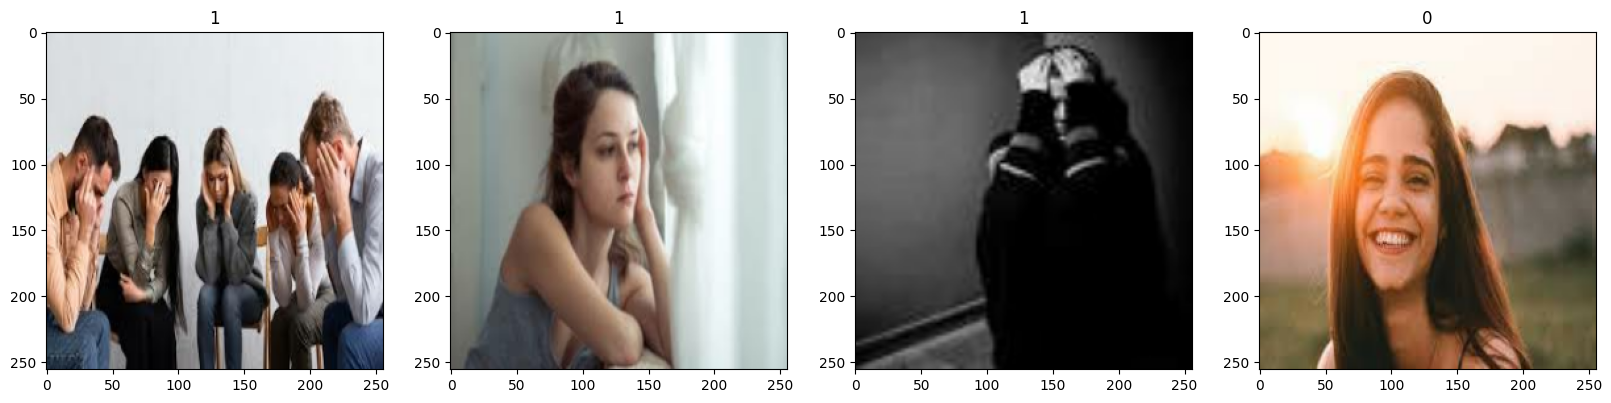

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>4. Escalamiento de los datos</font></h4>
    </strong>
</div><br>

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824],
          ...,
          [0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412]],
 
         [[0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824],
          ...,
          [0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412]],
 
         [[0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824],
          ...,
          [0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412]],
 
         ...,
 
         [[0.7275199 , 0.7039905 , 0.71183366],
          [0.72751

<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>5. Split</font></h4>
    </strong>
</div><br>

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
#este código divide el conjunto de datos original en tres partes: una para entrenamiento, 
#otra para validación y otra para pruebas, 
#de acuerdo con los tamaños especificados (train_size, val_size y test_size).

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>6. Build Deep Learning Model</font></h4>
    </strong>
</div><br>

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>7. Entrenamiento</font></h4>
    </strong>
</div><br>

In [20]:
logdir = 'logs'  # Directorio donde se guardarán los registros de TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
# Redimensiona las imágenes en el conjunto de datos de entrenamiento
train_resized = data.map(lambda x, y: (tf.image.resize(x, (254, 254)), y))

# Redimensiona las imágenes en el conjunto de datos de validación
val_resized = data.map(lambda x, y: (tf.image.resize(x, (254, 254)), y))

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 17s 2s/step - loss: 1.8441 - accuracy: 0.4327 - val_loss: 0.6837 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 15s 2s/step - loss: 0.6953 - accuracy: 0.5425 - val_loss: 0.6835 - val_accuracy: 0.5781
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 0.6786 - accuracy: 0.6456 - val_loss: 0.6533 - val_accuracy: 0.6406
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.6525 - accuracy: 0.6159 - val_loss: 0.6273 - val_accuracy: 0.5781
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 0.6441 - accuracy: 0.6335 - val_loss: 0.5037 - val_accuracy: 0.7812
Epoch 6/20
7/7 [==============================] - 16s 2s/step - loss: 0.5446 - accuracy: 0.7012 - val_loss: 0.4084 - val_accuracy: 0.8594
Epoch 7/20
7/7 [==============================] - 14s 2s/step - loss: 0.4407 - accuracy: 0.7943 - val_loss: 0.3086 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>8. Plot performance</font></h4>
    </strong>
</div><br>

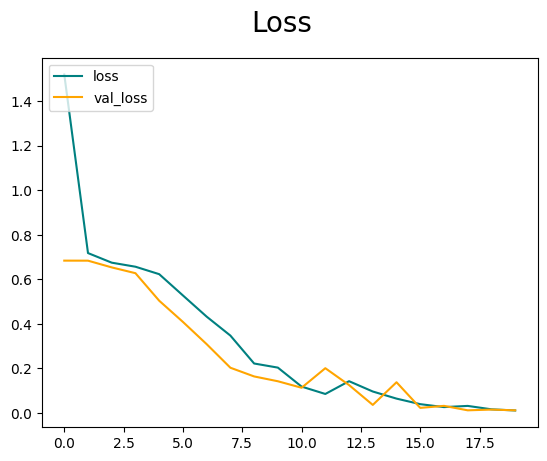

In [24]:

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

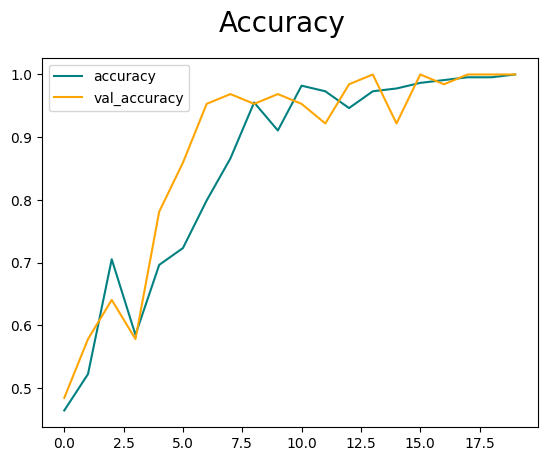

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>9. Evaluación</font></h4>
    </strong>
</div><br>

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [33]:
# Imprimir los resultados
print("Precision:", pre.result())
print("Recall:", re.result())
print("Accuracy:", acc.result())

Precision: tf.Tensor(1.0, shape=(), dtype=float32)
Recall: tf.Tensor(1.0, shape=(), dtype=float32)
Accuracy: tf.Tensor(1.0, shape=(), dtype=float32)


<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>10. Test</font></h4>
    </strong>
</div><br>

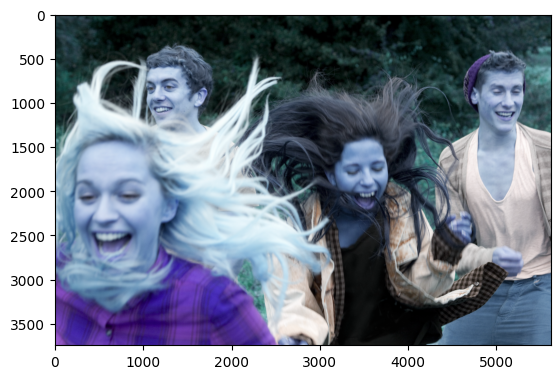

In [34]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

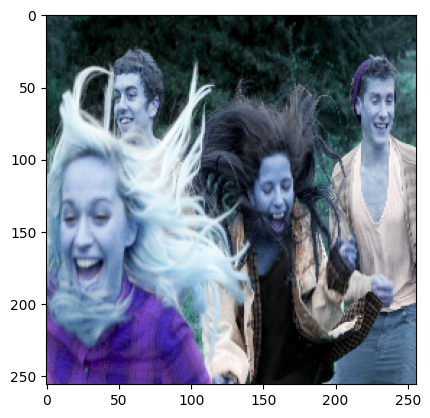

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [37]:
yhat

array([[0.40643147]], dtype=float32)

In [38]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


<div style="background:#5564eb;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>11. Guardo modelo</font></h4>
    </strong>
</div><br>

In [39]:
model.save(os.path.join('models','imageclassifier.h5'))